In [1]:
!wget -O image_chips_native-20250212T103727Z-001.zip "https://drive.google.com/drive/folders/13QfMQ-7OdWKw-LR8DmypKwSHtI0Hk2wh"

--2025-02-27 17:07:46--  https://drive.google.com/drive/folders/13QfMQ-7OdWKw-LR8DmypKwSHtI0Hk2wh
Resolving drive.google.com (drive.google.com)... 74.125.134.113, 74.125.134.139, 74.125.134.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘image_chips_native-20250212T103727Z-001.zip’

image_chips_native-     [ <=>                ] 254.51K  1.46MB/s    in 0.2s    

2025-02-27 17:07:46 (1.46 MB/s) - ‘image_chips_native-20250212T103727Z-001.zip’ saved [260622]



In [2]:
!unzip /content/drive/MyDrive/Copy_of_image_chips_native-20250212T103727Z-001.zip

Archive:  /content/drive/MyDrive/Copy_of_image_chips_native-20250212T103727Z-001.zip
  inflating: image_chips_native/solarpanels_native_2__x0_8521_y0_3953_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_0_y0_7513_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_5472_y0_12892_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_2__x0_2781_y0_5085_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_3__x0_615_y0_6709_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_5472_y0_12892_dxdy_416(1).tif  
  inflating: image_chips_native/solarpanels_native_3__x0_10395_y0_10287_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_9303_y0_11851_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_2__x0_8660_y0_3993_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_2__x0_8943_y0_4161_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_3__x0_9432

In [3]:
!unzip /content/drive/MyDrive/Copy_of_labels-20250212T103318Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: labels/labels_hd/solarpanels_hd_3__x0_15395_y0_25944_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_15641_y0_2228_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_2__x0_17159_y0_8199_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_1__x0_8985_y0_23459_dxdy_832(1).txt  
  inflating: labels/labels_hd/solarpanels_hd_2__x0_7109_y0_25732_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_16409_y0_24237_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_12679_y0_23513_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_1__x0_2428_y0_7538_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_2__x0_10910_y0_12903_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_1__x0_12278_y0_24478_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_11541_y0_2026_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_19007_y0_29

In [4]:
import os

# Folder paths
image_dir="/content/image_chips_native"
label_native_dir="/content/labels/labels_native"
label_hd_dir="/content/labels/labels_hd"

#Sorting files according to their names
image_files=[]
label_native_files=[]
label_hd_files=[]

for label_path in os.listdir(label_native_dir):
    label_native_files.append(label_path)

for label_path in os.listdir(label_hd_dir):
    if("(1)" in label_path):
      continue
    label_hd_files.append(label_path)

label_native_set=[]
for label_path in label_native_files:
    label_native_set.append(label_path[:-4]) #removing .txt

for img_path in os.listdir(image_dir):
    img_name = img_path[:-4]  # removing .tif
    if img_name in label_native_set:
        image_files.append(img_path) # keeping only images with a valid label
# sorting the files as both folders have files with the same file names
image_files.sort()
label_native_files.sort()
label_hd_files.sort()

In [5]:
#checking
for i in range(len(image_files)):
  if(image_files[i][:-4]!=label_native_files[i][:-4]):
    print(i)
print(len(image_files))
print(len(label_native_files))
print(len(label_hd_files))

2542
2542
2542


Data Exploration and Understanding
Dataset statistics



Calculate the statistics of the area of solar panels in meters (Read label readme carefully for this question)
What method was used to compute the area (in meters) for a single instance?
What is the mean area and standard deviation?
Plot the histogram of areas. What do you observe?


How many instances of solar panels are present in the dataset?

In [6]:
hd_labels_folder="/content/labels/labels_hd"
native_labels_folder="/content/labels/labels_native"

def count_lines_in_folder(folder_path):
    total_lines = 0
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            total_lines += len(file.readlines())
    return total_lines

hd_labels_lines=count_lines_in_folder(hd_labels_folder)
native_labels_lines=count_lines_in_folder(native_labels_folder)
print("number of hd resolution img solar panels:", hd_labels_lines)
print("number of native resolution img solar panels:", native_labels_lines)
print("total number of solar panels:", native_labels_lines+hd_labels_lines)

number of hd resolution img solar panels: 29880
number of native resolution img solar panels: 29625
total number of solar panels: 59505


Compute and show the value counts of labels per image. E.g., X images have 0 labels, Y images have 1 label, … and so on.


In [7]:
hd_res_img_tile_counts={}
# counting number of labels
for file_name in os.listdir(hd_labels_folder):
        tile_id=file_name[15]
        hd_res_img_tile_counts[tile_id]=hd_res_img_tile_counts.get(tile_id, 0) + 1

native_res_img_tile_counts={}

for file_name in os.listdir(native_labels_folder):
        tile_id=file_name[19]
        native_res_img_tile_counts[tile_id]=native_res_img_tile_counts.get(tile_id, 0) + 1

print("Labels per HD res img Tile:")
for tile, count in sorted(hd_res_img_tile_counts.items()):
    print("Tile", tile,":",count,"labels")
print("Labels per native res img Tile:")
for tile, count in sorted(native_res_img_tile_counts.items()):
    print("Tile", tile,":",count,"labels")


Labels per HD res img Tile:
Tile 1 : 999 labels
Tile 2 : 638 labels
Tile 3 : 915 labels
Labels per native res img Tile:
Tile 1 : 989 labels
Tile 2 : 638 labels
Tile 3 : 915 labels


Calculate the statistics of the area of solar panels in meters (Read label readme carefully for this question)
What method was used to compute the area (in meters) for a single instance?
What is the mean area and standard deviation?
Plot the histogram of areas. What do you observe?


The area is computed using bounding box dimensions from YOLO format and converting them to meters by scaling them. We obtain the area of each solar panel by scaling the width and height of each bounding box and finding area by multiplying it the width and height.

In [8]:
import numpy as np

label_files = [label_native_files,label_hd_files]
IMAGE_SIZES = {
    416: 0.31,
    832: 0.155
} # The scaling factor of images as per the resolution
areas = []
for label_file in label_files:
    for file_name in label_file:
            image_size = int(file_name[-7:-4])
            resolution = IMAGE_SIZES[image_size]
            if(image_size==832):
              file_path="/content/labels/labels_hd/"+file_name
            else:
              file_path="/content/labels/labels_native/"+file_name
            with open(file_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    x_center, y_center, x_width, y_width = float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])

                    actual_width_m = x_width * image_size * resolution
                    actual_height_m = y_width * image_size * resolution

                    area_m2 = actual_width_m * actual_height_m
                    areas.append(area_m2)

areas = np.array(areas)
mean_area = np.mean(areas)
std_dev_area = np.std(areas)

print("Total Solar Panels:",len(areas))
print("Mean Area:",mean_area,"m^2")
print("Standard Deviation:",std_dev_area,"m^2")


Total Solar Panels: 59416
Mean Area: 190.0988148895079 m^2
Standard Deviation: 619.6196957841796 m^2


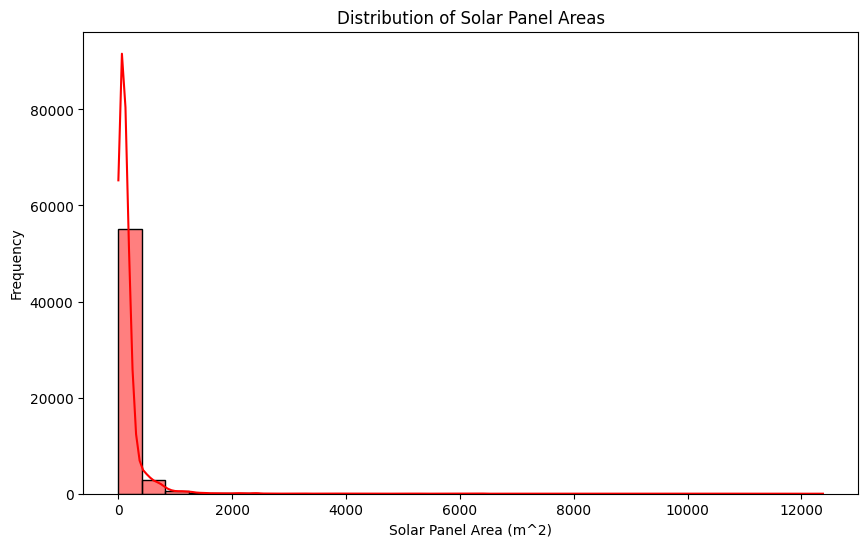

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(areas, bins=30,color='r',kde=True)

plt.xlabel("Solar Panel Area (m^2)")
plt.ylabel("Frequency")
plt.title("Distribution of Solar Panel Areas")
plt.show()

Observations-

Highly Skewed Distribution – Most solar panel areas are very small, clustering near the left side of the plot (closer to 0 m²).

Long Tail – There are a few solar panels with much larger areas, extending beyond 2000 m², possibly even above 10,000 m².

Extremely High Frequency for Small Areas – A large number of instances have small solar panel areas, leading to a sharp peak at the lower end.

In [10]:
pip install shapely

In [11]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.1 MB/s eta 0:00:00


In [12]:
import shapely
from shapely import intersection
from shapely import union
from shapely.geometry import box
import supervision as sv

def yolo_to_pixel(box):
  x_c,y_c,w,h=box
  x_left=(x_c-w/2)*416
  y_bottom=(y_c-h/2)*416
  x_right=(x_c+w/2)*416
  y_top=(y_c+h/2)*416
  return x_left,y_bottom,x_right,y_top

def bb_intersection_over_union(boxA, boxB):
  boxA=yolo_to_pixel(boxA)
  boxB=yolo_to_pixel(boxB)
  box1=shapely.box(boxA[0],boxA[1],boxA[2],boxA[3])
  box2=shapely.box(boxB[0],boxB[1],boxB[2],boxB[3])
  i=intersection(box1,box2, grid_size=1)
  u=union(box1,box2)
  return shapely.area(i)/shapely.area(u)

In [13]:
# Example case
boxA=[39, 63, 203, 112]
boxB= [54, 66, 198, 114]

In [14]:
iou_shapely = bb_intersection_over_union(boxA, boxB)

# Computing IoU using Supervision
box1_np=np.array([yolo_to_pixel(boxA)])
box2_np=np.array([yolo_to_pixel(boxB)])

iou_supervision = sv.box_iou_batch(box1_np, box2_np)[0, 0]

print("IoU (Shapely):",iou_shapely)
print("IoU (Supervision):",iou_supervision)

if (iou_shapely-iou_supervision<1e-4):
    print("IoU values are similar!")

IoU (Shapely): 0.8193791912620969
IoU (Supervision): 0.8193791912620969
IoU values are similar!



Write a function to compute Average Precision (AP)
Use Pascal VOC 11 point interpolation method to implement the function


In [15]:
def Average_Precision_Pascal_VOC_11(recall, precision):
    recall_levels=[]
    max_precision=[]
    for i in range(11):
      recall_levels.append(0.1*i)
      max_precision.append(0)

    for i in range(len(recall)):
        for j in range(len(recall)-i-1):
            if recall[j]>recall[j+1]:
                recall[j],recall[j+1]=recall[j+1],recall[j]
                precision[j],precision[j+1]=precision[j+1],precision[j]

    for i in range(11):
        r=recall_levels[i]
        max_prec=0
        for j in range(len(recall)):
            if recall[j]>=r:
                if precision[j]>max_prec:
                    max_prec=precision[j]
        max_precision[i]=max_prec

    ap_sum = 0
    for p in max_precision:
        ap_sum+=p
    return ap_sum/len(recall_levels)

Use COCO 101-point interpolation method to implement the function

In [16]:
def Average_Precision_COCO_101(recall, precision):
    recall_levels=[]
    max_precision=[]
    for i in range(101):
      recall_levels.append(0.01*i)
      max_precision.append(0)

    for i in range(len(recall)):
        for j in range(len(recall)-i-1):
            if recall[j]>recall[j+1]:
                recall[j],recall[j+1]=recall[j+1],recall[j]
                precision[j],precision[j+1]=precision[j+1],precision[j]

    for i in range(101):
        r=recall_levels[i]
        max_prec=0
        for j in range(len(recall)):
            if recall[j]>=r:
                if precision[j]>max_prec:
                    max_prec=precision[j]
        max_precision[i]=max_prec

    ap_sum = 0
    for p in max_precision:
        ap_sum+=p
    return ap_sum/len(recall_levels)

In [17]:
def Average_Precision_AUC(recall, precision):
    for i in range(len(recall)):
        for j in range(len(recall)-i-1):
            if recall[j]>recall[j+1]:
                recall[j],recall[j+1]=recall[j+1],recall[j]
                precision[j],precision[j+1]=precision[j+1],precision[j]

    ap=0
    for i in range(1,len(recall)):
        ap+=(recall[i]-recall[i-1])*precision[i]
    return ap

In [18]:
import random

# Generating random ground truth and predicted boxes
num_images=10
img_size=100
box_size=20

ground_truth_boxes=[]
predicted_boxes=[]

for i in range(num_images):
    gt_boxes=[]
    pred_boxes=[]

    for _ in range(10):
        gt_x=random.randint(0,img_size-box_size)
        gt_y=random.randint(0,img_size-box_size)
        pred_x=random.randint(0,img_size-box_size)
        pred_y=random.randint(0,img_size-box_size)

        gt_boxes.append([gt_x,gt_y,gt_x+box_size,gt_y+box_size])
        pred_boxes.append([pred_x,pred_y,pred_x+box_size,pred_y+box_size])

    ground_truth_boxes.append(gt_boxes)
    predicted_boxes.append(pred_boxes)

iou_threshold=0.5
tp_fp=[]

for i in range(num_images):
    gt_boxes=ground_truth_boxes[i]
    pred_boxes=predicted_boxes[i]

    for pred_box in pred_boxes:
      ious=[0]
      for gt_box in gt_boxes:
        ious.append(bb_intersection_over_union(pred_box, gt_box))
        max_iou=max(ious)
        if(max_iou>=iou_threshold):
            tp_fp.append(1)

# Computing Precision-Recall curve
cumulative_tp=0
precision=[]
recall=[]
total_gt_boxes=num_images*10

tp_fp.sort()
tp_fp_sorted=tp_fp[::-1]
cumulative_tp = 0
precision, recall = [], []

i = 1
for is_tp in tp_fp_sorted:
    cumulative_tp += is_tp
    precision.append(cumulative_tp / i)
    recall.append(cumulative_tp / total_gt_boxes)
    i += 1

# Compute AP50 using all 3 methods
ap_voc_11=Average_Precision_Pascal_VOC_11(recall, precision)
ap_coco_101=Average_Precision_COCO_101(recall, precision)
ap_auc=Average_Precision_AUC(recall, precision)

# Print Results
print("mAP (Pascal VOC 11-point):",ap_voc_11)
print("mAP (COCO 101-point):",ap_coco_101)
print("mAP (AUC Method):",ap_auc)


mAP (Pascal VOC 11-point): 1.0
mAP (COCO 101-point): 1.0
mAP (AUC Method): 4.720000000000001


In [19]:
X_train = image_files
y_train = label_native_files

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")


Training set: 1829 images
Validation set: 204 images
Test set: 509 images


In [21]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [22]:
import os
import shutil

# Define paths
base_dir = "/content/split_dataset"
os.makedirs(base_dir, exist_ok=True)

splits = {
    "train": (X_train, y_train),
    "val": (X_val, y_val),
    "test": (X_test, y_test)
}

# Creating train, val, test folders and move files
for split, (X_list, y_list) in splits.items():
    image_dir = os.path.join(base_dir, split, "images")
    label_dir = os.path.join(base_dir, split, "labels")
    os.makedirs(image_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)

    for img_file, label_file in zip(X_list, y_list):
        shutil.copy(os.path.join("/content/image_chips_native", img_file), image_dir)
        shutil.copy(os.path.join("/content/labels/labels_native", label_file), label_dir)

print("Data split and files moved successfully!")


Data split and files moved successfully!


In [23]:
yaml_path = "/content/data.yaml"

yaml_content = """\
path: /content/split_dataset
train: train/images
val: val/images
test: test/images
names:
  0: solarpanel
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"data.yaml file created at {yaml_path}")


data.yaml file created at /content/data.yaml


In [24]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(data="data.yaml",epochs=5,imgsz=640,val=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 72.5MB/s]


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/split_dataset/train/labels... 1829 images, 0 backgrounds, 171 corrupt: 100%|██████████| 1829/1829 [00:01<00:00, 1125.67it/s]

train: WARNING ⚠️ /content/split_dataset/train/images/solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/split_dataset/train/images/solarpanels_native_1__x0_0_y0_7229_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/split_dataset/train/images/solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/split_dataset/train/images/solarpanels_native_1__x0_128_y0_7056_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/split_dataset/train/images/solarpanels_native_1__x0_1300_y0_10050_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset

train: New cache created: /content/split_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/split_dataset/val/labels... 204 images, 0 backgrounds, 25 corrupt: 100%|██████████| 204/204 [00:00<00:00, 956.55it/s]

val: WARNING ⚠️ /content/split_dataset/val/images/solarpanels_native_1__x0_0_y0_7119_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/split_dataset/val/images/solarpanels_native_1__x0_0_y0_7230_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/split_dataset/val/images/solarpanels_native_1__x0_1536_y0_10086_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/split_dataset/val/images/solarpanels_native_1__x0_2309_y0_8071_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/split_dataset/val/images/solarpanels_native_1__x0_299_y0_7578_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. P

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.717      2.306      1.423        149        224: 100%|██████████| 104/104 [03:54<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.66s/it]

                   all        179       2141      0.386      0.319      0.246     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       2.18       1.45      1.186        208        224: 100%|██████████| 104/104 [03:41<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all        179       2141        0.5      0.456      0.444      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.046      1.339      1.147        205        224: 100%|██████████| 104/104 [03:43<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]

                   all        179       2141      0.583      0.399      0.475      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.888       1.22      1.096        142        224: 100%|██████████| 104/104 [03:24<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        179       2141       0.72       0.52      0.597      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.797      1.154      1.062        126        224: 100%|██████████| 104/104 [03:20<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]

                   all        179       2141       0.69      0.552      0.622      0.368



5 epochs completed in 0.319 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.09s/it]


                   all        179       2141      0.692      0.551      0.622      0.368
Speed: 1.1ms preprocess, 50.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


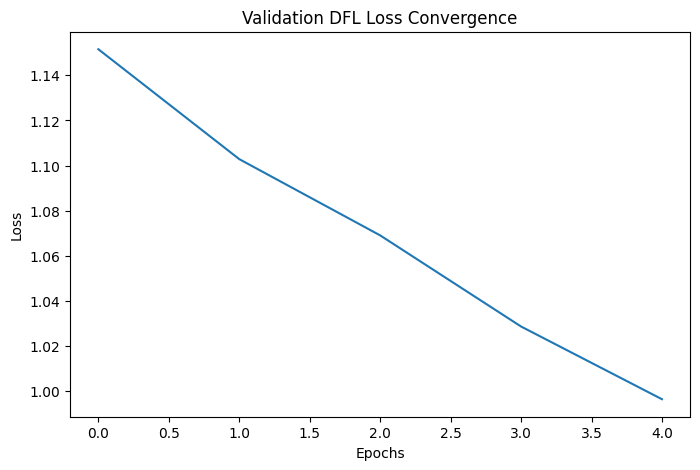

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

val_losses = df["val/dfl_loss"]

plt.figure(figsize=(8, 5))
plt.plot(val_losses,label="Validation DFL Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation DFL Loss Convergence")
plt.show()

In [85]:
import os
import random
import cv2

test_images_path="/content/split_dataset/test/images"
test_labels_path="/content/split_dataset/test/labels"

test_images=[]
for img_path in os.listdir(test_images_path):
    test_images.append(img_path)

test_labels=[]
for img_path in os.listdir(test_labels_path):
    test_labels.append(img_path)

# random.seed(42)
random_samples = random.sample(test_images, 3)  # Selecting 3 random images
print(random_samples)


['solarpanels_native_2__x0_9928_y0_2055_dxdy_416.tif', 'solarpanels_native_2__x0_2850_y0_5235_dxdy_416.tif', 'solarpanels_native_2__x0_9772_y0_2559_dxdy_416.tif']



image 1/1 /content/split_dataset/test/images/solarpanels_native_2__x0_9928_y0_2055_dxdy_416.tif: 640x640 2 carrots, 247.7ms
Speed: 5.5ms preprocess, 247.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


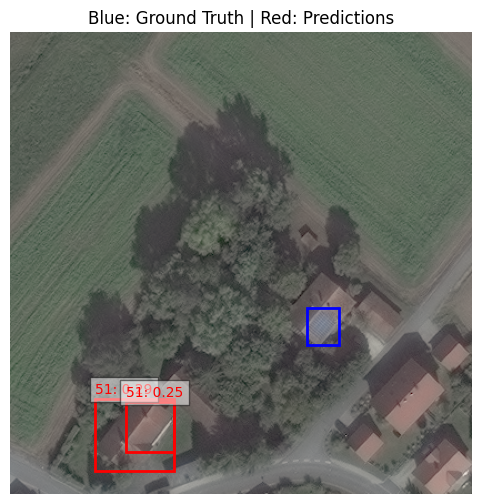


image 1/1 /content/split_dataset/test/images/solarpanels_native_2__x0_2850_y0_5235_dxdy_416.tif: 640x640 (no detections), 267.2ms
Speed: 6.2ms preprocess, 267.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


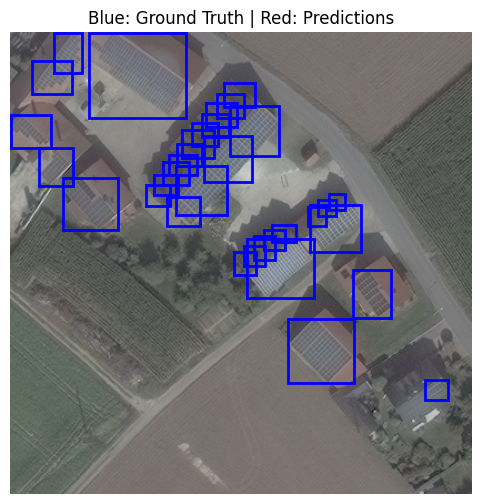


image 1/1 /content/split_dataset/test/images/solarpanels_native_2__x0_9772_y0_2559_dxdy_416.tif: 640x640 (no detections), 276.9ms
Speed: 7.0ms preprocess, 276.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


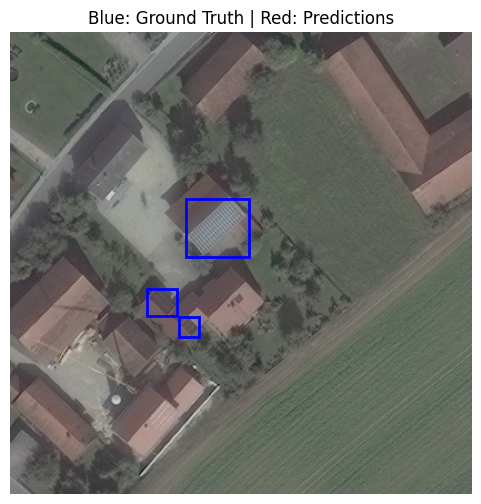

In [86]:
import cv2

def plot_results(image_path, label_path, model):
    # Reading Image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Loading ground truth labels
    h, w = image.shape[0], image.shape[1]
    gt_boxes = []
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            x_center, y_center, bbox_width, bbox_height = float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
            # Converting YOLO format to pixel coordinates
            x1 = ((x_center - bbox_width / 2) * w)
            y1 = ((y_center - bbox_height / 2) * h)
            x2 = ((x_center + bbox_width / 2) * w)
            y2 = ((y_center + bbox_height / 2) * h)
            gt_boxes.append((x1, y1, x2, y2))

    # Get model predictions
    results = model.predict(image_path)[0]

    # Extract predicted bounding boxes, scores, and labels
    pred_boxes = results.boxes.xyxy.cpu().numpy()  # Bounding boxes
    pred_scores = results.boxes.conf.cpu().numpy()  # Confidence scores
    pred_labels = results.boxes.cls.cpu().numpy()   # Class labels

    # Plot image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    # Plot ground truth boxes (Blue)
    for x1, y1, x2, y2 in gt_boxes:
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                          edgecolor="blue", linewidth=2, fill=False))

    # Plot predicted boxes (Red) with confidence scores
    for (x1, y1, x2, y2), score, label in zip(pred_boxes, pred_scores, pred_labels):
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                          edgecolor="red", linewidth=2, fill=False))
        plt.text(x1, y1 - 5, f"{label:.0f}: {score:.2f}", color="red", fontsize=10,
                 bbox=dict(facecolor="white", alpha=0.5))

    plt.title("Blue: Ground Truth | Red: Predictions")
    plt.axis("off")
    plt.show()

    return gt_boxes, pred_boxes, pred_scores, pred_labels

for img_path in random_samples:
    label_path=test_labels_path+"/"+img_path[:-4]+".txt"
    img_path=test_images_path+"/"+img_path
    gt_boxes, pred_boxes, pred_scores, pred_labels = plot_results(img_path, label_path, model)

In [90]:
import torch
import cv2
import os

# Path prefix
prepath = "/content/image_chips_native"

# Initialize lists to store predictions
all_pred_boxes = []
all_pred_scores = []
all_pred_labels = []

# Loop through test images
for img_name in X_test:
    img_path = os.path.join(prepath, img_name)  # Add prefix to image path

    # Run model inference
    results = model(img_path)[0]  # Get first result (single image)

    # Extract predictions
    pred_boxes = results.boxes.xyxy.cpu().numpy()  # Bounding boxes
    pred_scores = results.boxes.conf.cpu().numpy()  # Confidence scores
    pred_labels = results.boxes.cls.cpu().numpy()   # Class labels

    # Append to lists
    all_pred_boxes.append(pred_boxes)
    all_pred_scores.append(pred_scores)
    all_pred_labels.append(pred_labels)

# Now you have predictions for each image in X_test



image 1/1 /content/image_chips_native/solarpanels_native_3__x0_10105_y0_14149_dxdy_416.tif: 640x640 (no detections), 236.6ms
Speed: 5.5ms preprocess, 236.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native/solarpanels_native_1__x0_7918_y0_11152_dxdy_416.tif: 640x640 (no detections), 235.8ms
Speed: 4.6ms preprocess, 235.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native/solarpanels_native_1__x0_5880_y0_13362_dxdy_416.tif: 640x640 1 umbrella, 235.6ms
Speed: 4.8ms preprocess, 235.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native/solarpanels_native_2__x0_770_y0_10677_dxdy_416.tif: 640x640 9 books, 256.1ms
Speed: 6.8ms preprocess, 256.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native/solarpanels_native_1__x0_6627_y0_8649_dxdy_416.tif: 640x640 (no detections), 232.9

Compute mAP50 with supervision and compare with your implementation.

In [92]:
csv_path = "/content/runs/detect/train/results.csv"

df = pd.read_csv(csv_path)

precision = df["metrics/precision(B)"]
recall = df["metrics/recall(B)"]

In [94]:

# Compute AP50 using all 3 methods
ap_voc_11 = Average_Precision_Pascal_VOC_11(recall, precision)
ap_coco_101 = Average_Precision_COCO_101(recall, precision)
ap_auc = Average_Precision_AUC(recall, precision)

# Print Results
print("AP50 (Pascal VOC 11-point):",ap_voc_11)
print("AP50 (COCO 101-point):",ap_coco_101)
print("AP50 (AUC Method):",ap_auc)

AP50 (Pascal VOC 11-point): 0.3929781818181818
AP50 (COCO 101-point): 0.3985683168316831
AP50 (AUC Method): 0.14355773440000003


In [95]:
from supervision.metrics import MeanAveragePrecision


In [88]:
print(predictions)

Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={'class_name': array([], dtype=float64)}, metadata={})


In [98]:
def load_yolo_annotations(txt_file, img_shape):
    h, w = img_shape[:2]
    boxes, classes = [], []

    with open(txt_file, "r") as f:
        for line in f:
            c, xc, yc, bw, bh = map(float, line.split())
            x_min, y_min = (xc - bw / 2) * w, (yc - bh / 2) * h
            x_max, y_max = (xc + bw / 2) * w, (yc + bh / 2) * h
            boxes.append([x_min, y_min, x_max, y_max])
            classes.append(int(c))

    return np.array(boxes), np.array(classes)

train_images_path="/content/split_dataset/train/images"
train_labels_path="/content/split_dataset/train/labels"
map_sv=0
# Load image and targets
for i in range(len(X_train)):
    image = cv2.imread(train_images_path+"/"+X_train[i])
    target_boxes, target_classes = load_yolo_annotations(train_labels_path+"/"+y_train[i], image.shape)
    targets = sv.Detections(xyxy=target_boxes, class_id=target_classes)
    # Get predictions
    results = model(image)[0]
    predictions = sv.Detections.from_ultralytics(results)

    # Compute mAP
    map_result = MeanAveragePrecision().update(predictions, targets).compute()
    map_sv+=map_result.map50_95
map_sv=map_sv/len(test_images)
print(map_sv)


0: 640x640 (no detections), 244.0ms
Speed: 7.0ms preprocess, 244.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 book, 1 toothbrush, 245.2ms
Speed: 5.2ms preprocess, 245.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 244.6ms
Speed: 6.0ms preprocess, 244.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 237.3ms
Speed: 5.3ms preprocess, 237.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 233.4ms
Speed: 5.0ms preprocess, 233.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 241.9ms
Speed: 5.1ms preprocess, 241.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 250.4ms
Speed: 5.1ms preprocess, 250.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 243.5ms
Speed: 5.3ms 

KeyboardInterrupt: 

In [99]:
print("mAP50 (Supervision):",map_sv)

mAP50 (Supervision): 0.0


In [106]:
import cv2

# Load a sample image
image_path = "/content/split_dataset/train/images/solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif"
image = cv2.imread(image_path)

# Run inference
result = model(image)[0]

# Print results
print(result.boxes.xyxy)  # Bounding boxes
print(result.boxes.cls)    # Class labels
print(result.boxes.conf)   # Confidence scores



0: 640x640 1 cake, 714.4ms
Speed: 20.5ms preprocess, 714.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
tensor([[  0.0000, 306.3532, 120.5339, 415.8132]])
tensor([55.])
tensor([0.5228])


In [104]:
import supervision as sv

# Define the dataset path
dataset_root = "/content/train"

def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

# Create the dataset
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_root}/images",
    annotations_directory_path=f"{dataset_root}/labels",
    data_yaml_path="/content/data.yaml"
)

confusion_matrix = sv.ConfusionMatrix.benchmark(
    dataset = dataset,
    callback = callback
)

print(confusion_matrix.matrix)

[[          0           0]
 [          0           0]]


In [100]:
import numpy as np
import supervision as sv
from supervision.metrics import ConfusionMatrix

# Define IoU and confidence thresholds
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialize tables
precision_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
recall_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
f1_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))

# Loop through IoU and confidence thresholds
for i, iou_thr in enumerate(iou_thresholds):
    for j, conf_thr in enumerate(conf_thresholds):
        # Filter predictions based on confidence
        filtered_preds = predictions[predictions.confidence > conf_thr]

        # Compute confusion matrix
        cm = ConfusionMatrix.from_detections(
            detections=filtered_preds, ground_truth=targets, iou_threshold=iou_thr
        )

        # Get TP, FP, FN
        TP, FP, FN = cm.true_positives, cm.false_positives, cm.false_negatives

        # Compute Precision, Recall, and F1-score
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store in tables
        precision_table[i, j] = precision
        recall_table[i, j] = recall
        f1_table[i, j] = f1_score

# Print tables
print("Precision Table:\n", precision_table)
print("Recall Table:\n", recall_table)
print("F1-Score Table:\n", f1_table)


ImportError: cannot import name 'ConfusionMatrix' from 'supervision.metrics' (/usr/local/lib/python3.11/dist-packages/supervision/metrics/__init__.py)

In [107]:
def compute_metrics():
    print("\nPrecision, Recall, and F1-scores Table")
    print("IoU \ Conf", "\t".join(map(str, conf_thresholds)))

    for iou in iou_thresholds:
        row_prec, row_rec, row_f1 = [], [], []
        for conf in conf_thresholds:
            confusion_matrix = sv.ConfusionMatrix.benchmark(
                dataset=dataset,
                callback=callback,
                conf_threshold=conf,
                iou_threshold=iou,
            )
            TP, FP, FN = confusion_matrix.matrix[1, 1], confusion_matrix.matrix[0, 1], confusion_matrix.matrix[1, 0]
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            row_prec.append(f"{precision:.2f}")
            row_rec.append(f"{recall:.2f}")
            row_f1.append(f"{f1_score:.2f}")
        print(f"IoU {iou}")
        print("Precision: \t" + "\t".join(row_prec))
        print("Recall: \t" + "\t".join(row_rec))
        print("F1-score: \t" + "\t".join(row_f1))
        print("-" * 50)

iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
compute_metrics()


Precision, Recall, and F1-scores Table
IoU \ Conf 0.1	0.3	0.5	0.7	0.9
IoU 0.1
Precision: 	0.00	0.00	0.00	0.00	0.00
Recall: 	0.00	0.00	0.00	0.00	0.00
F1-score: 	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------
IoU 0.3
Precision: 	0.00	0.00	0.00	0.00	0.00
Recall: 	0.00	0.00	0.00	0.00	0.00
F1-score: 	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------
IoU 0.5
Precision: 	0.00	0.00	0.00	0.00	0.00
Recall: 	0.00	0.00	0.00	0.00	0.00
F1-score: 	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------
IoU 0.7
Precision: 	0.00	0.00	0.00	0.00	0.00
Recall: 	0.00	0.00	0.00	0.00	0.00
F1-score: 	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------
IoU 0.9
Precision: 	0.00	0.00	0.00	0.00	0.00
Recall: 	0.00	0.00	0.00	0.00	0.00
F1-score: 	0.00	0.00	0.00	0.00	0.00
--------------------------------------------------
